In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/EGBUNA/Jiji_web_data/jiji_house_data(cleaned).csv') # reading the data into a variable called DATA

In [3]:
## seperating the data into categorical and nuerical values
cat = [f for f in data.columns if data[f].dtype == 'object']
num = [f for f in data.columns if f not in cat]


<Figure size 720x720 with 0 Axes>

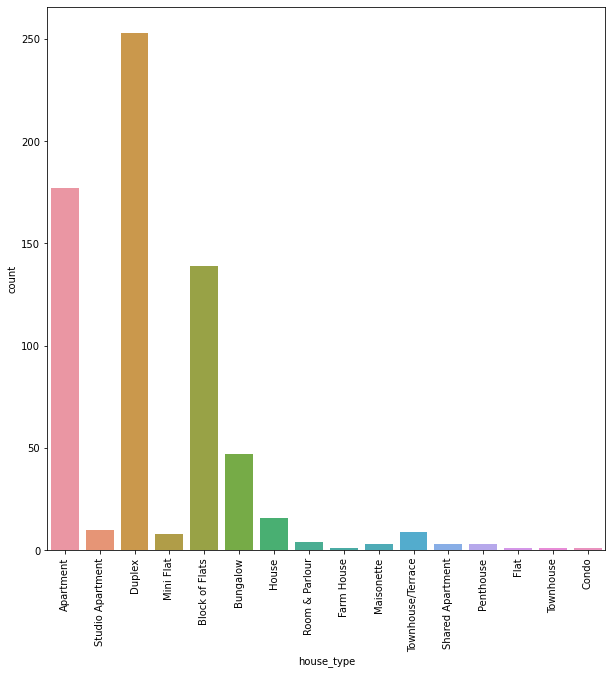

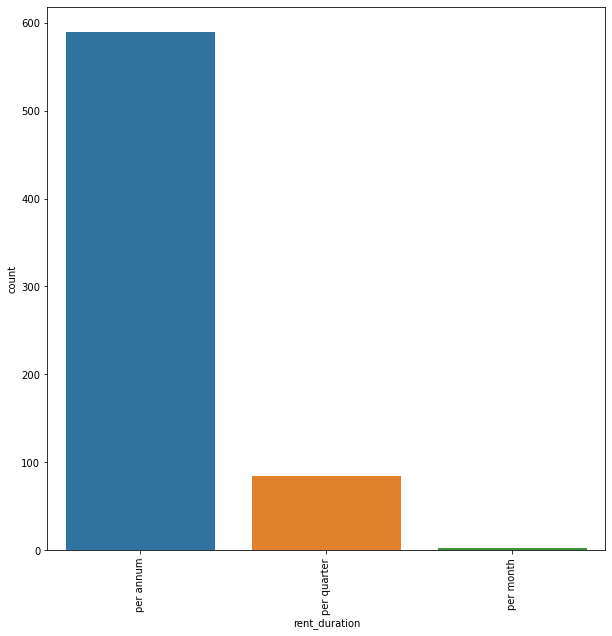

<Figure size 720x720 with 0 Axes>

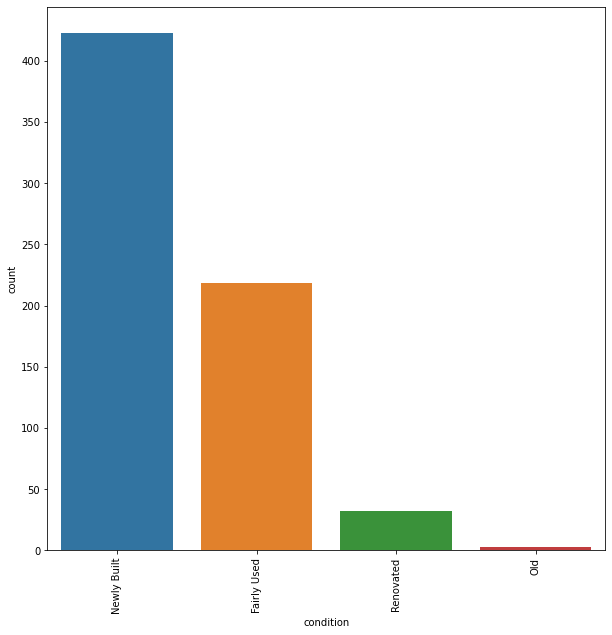

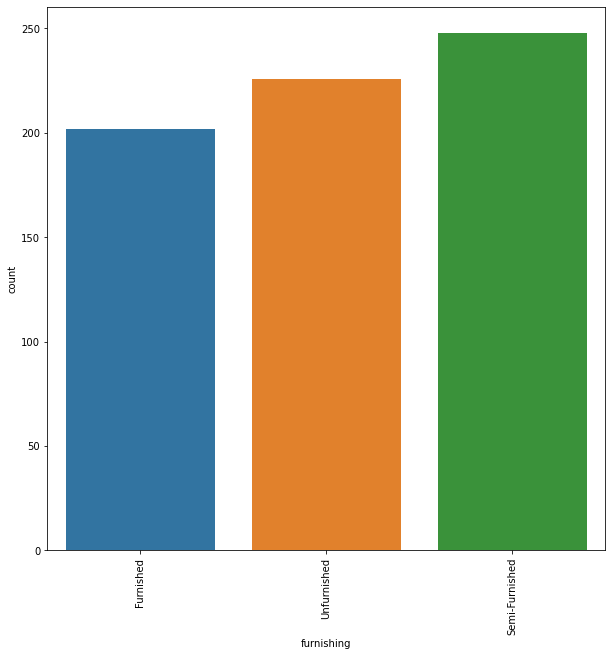

<Figure size 720x720 with 0 Axes>

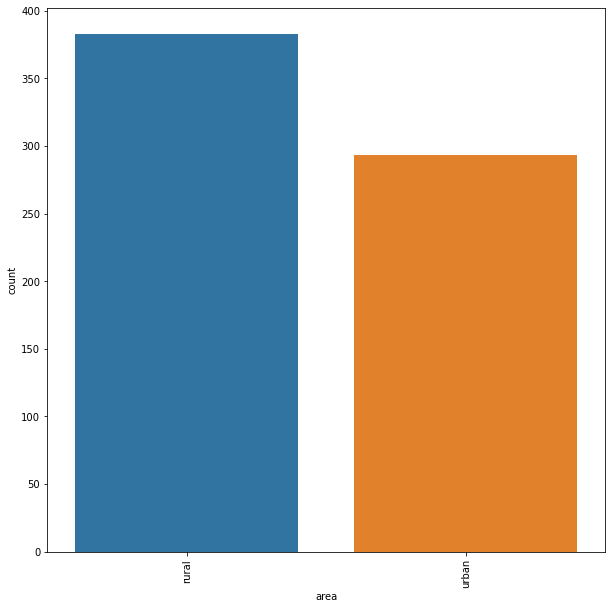

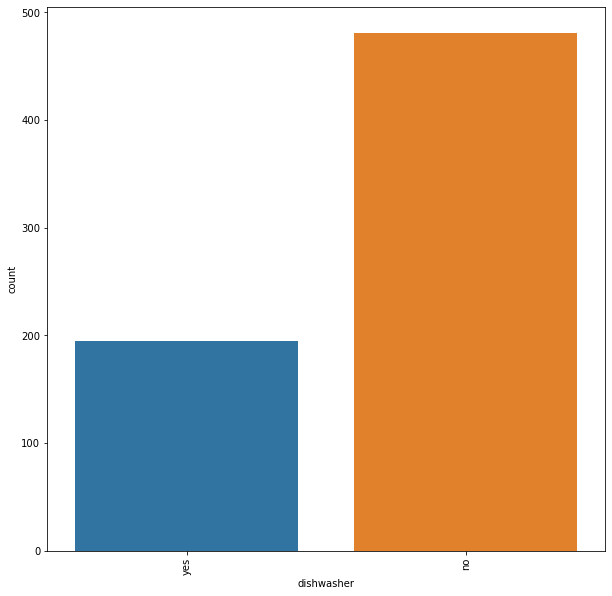

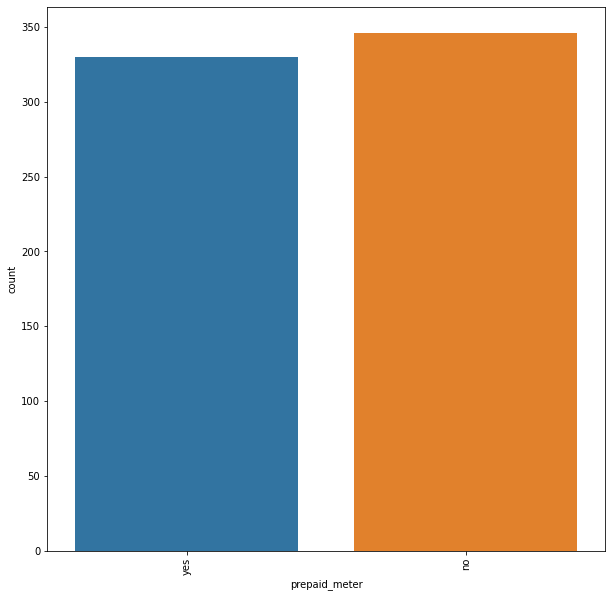

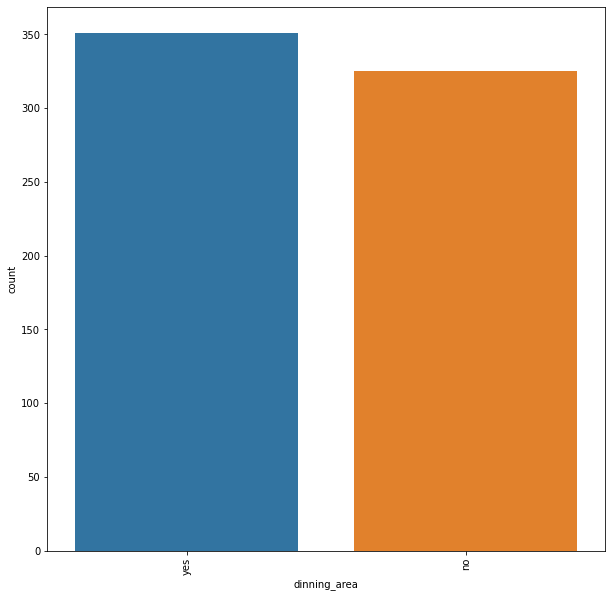

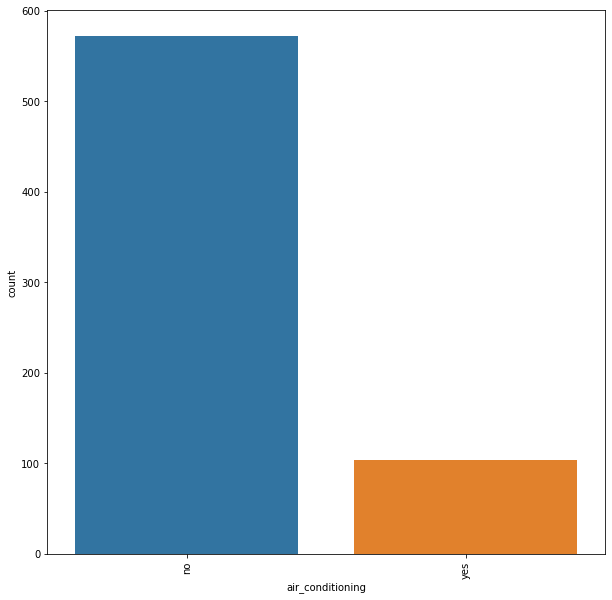

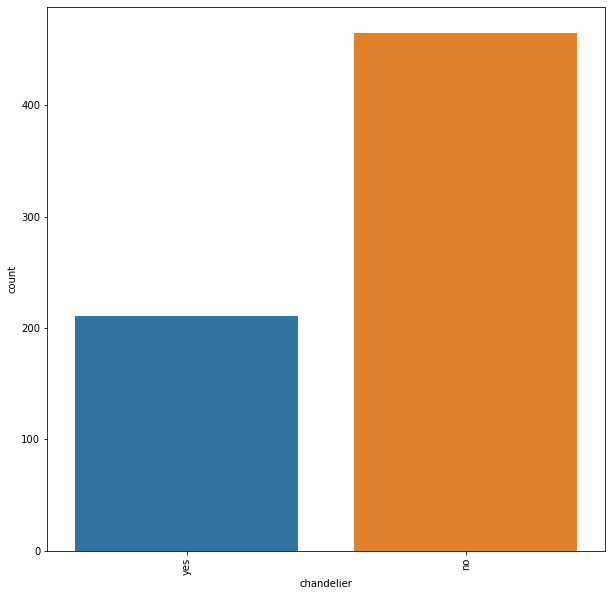

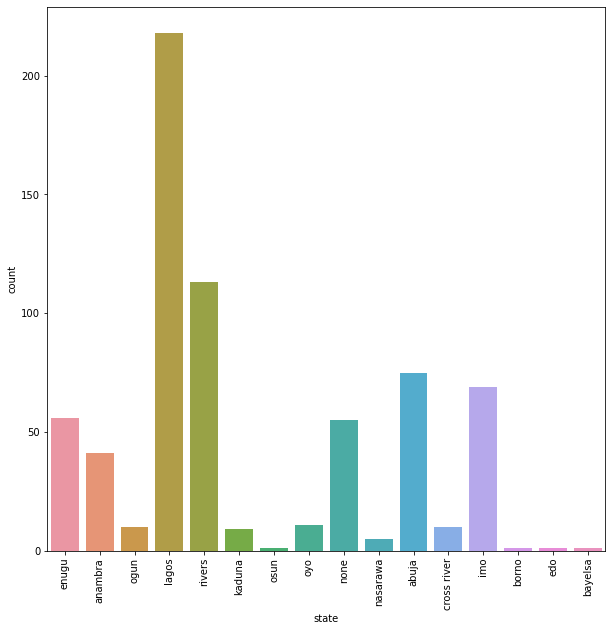

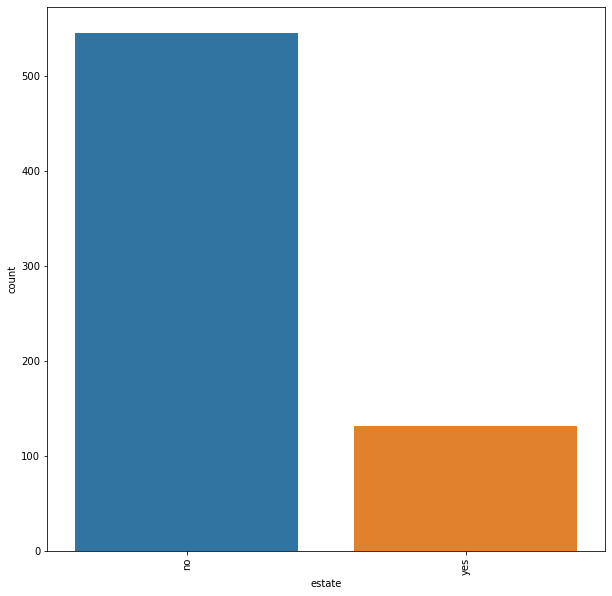

In [4]:
## visualizing the categorical values first
## using count plot to check the number of unique values in each column

for column in cat:
    plt.figure(figsize = (10,10))
    if column in ['location','estate name','facilities']:
        pass
    else:
        sns.countplot(x = data[column])
        plt.xticks(rotation = 90)
        plt.show()

<Figure size 720x720 with 0 Axes>

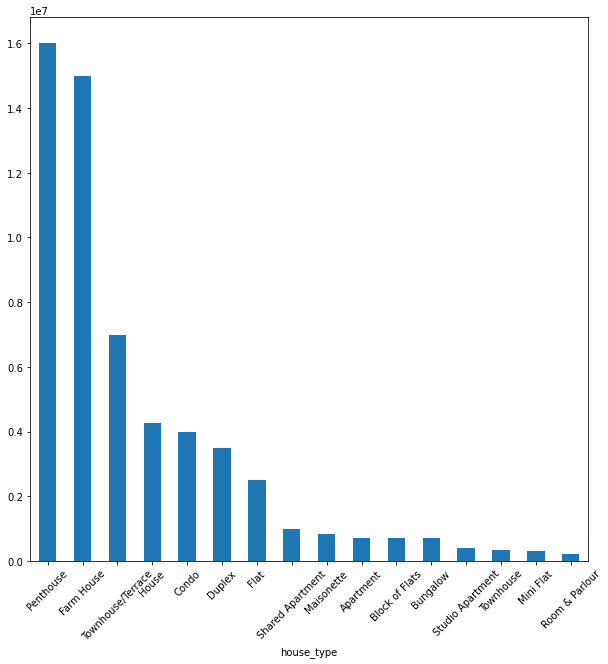

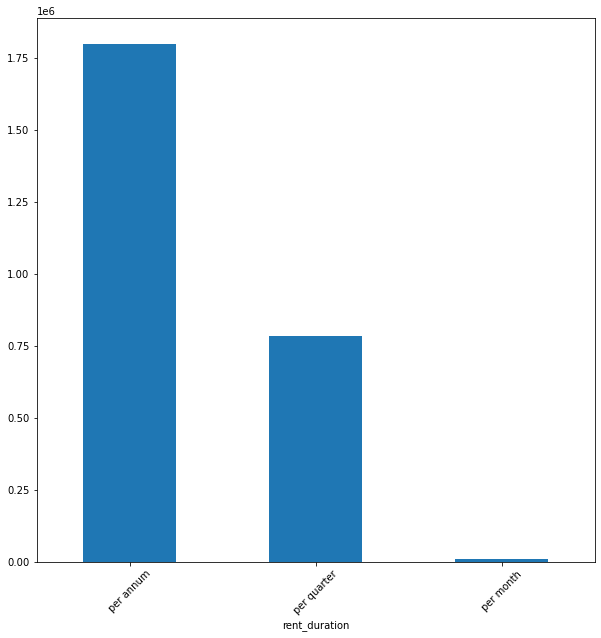

<Figure size 720x720 with 0 Axes>

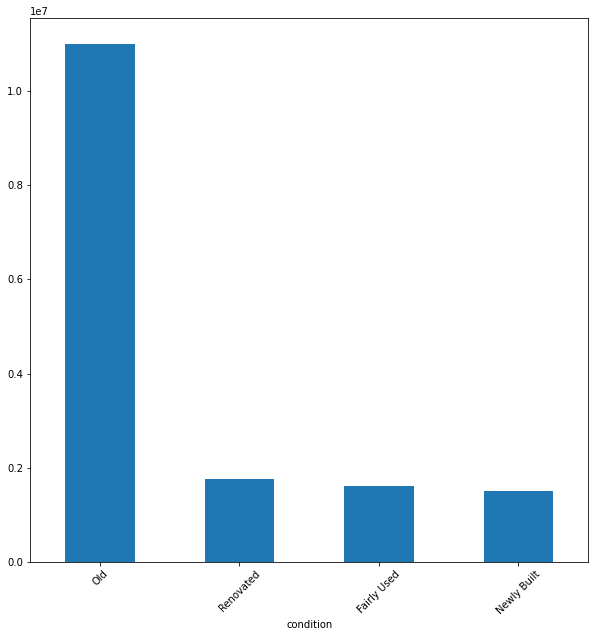

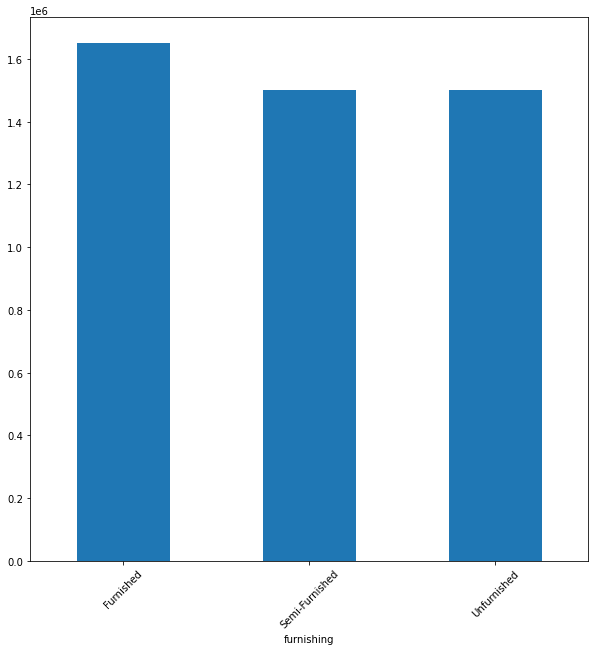

<Figure size 720x720 with 0 Axes>

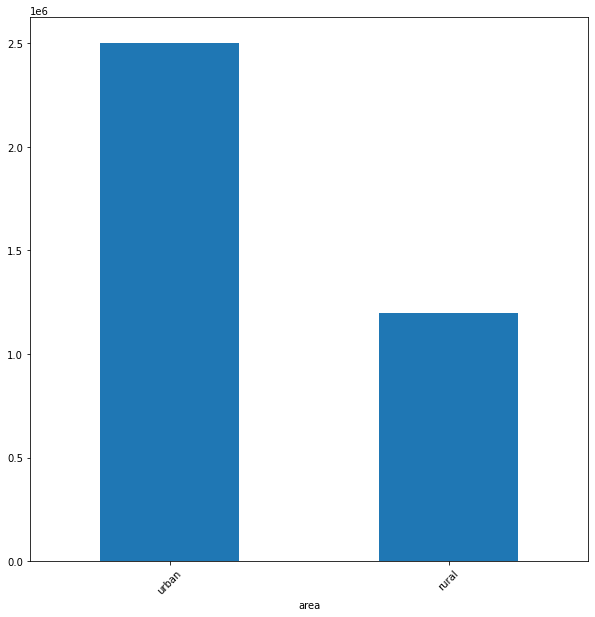

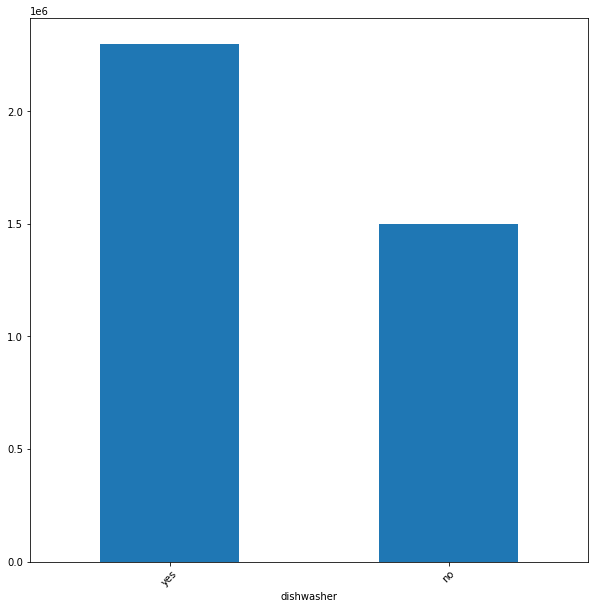

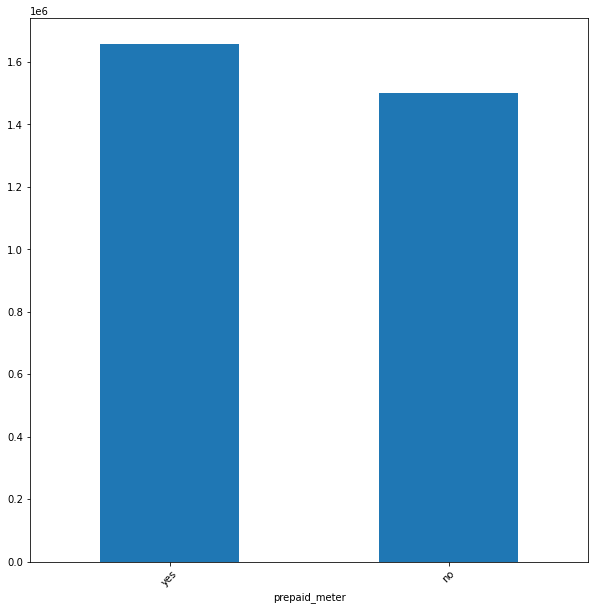

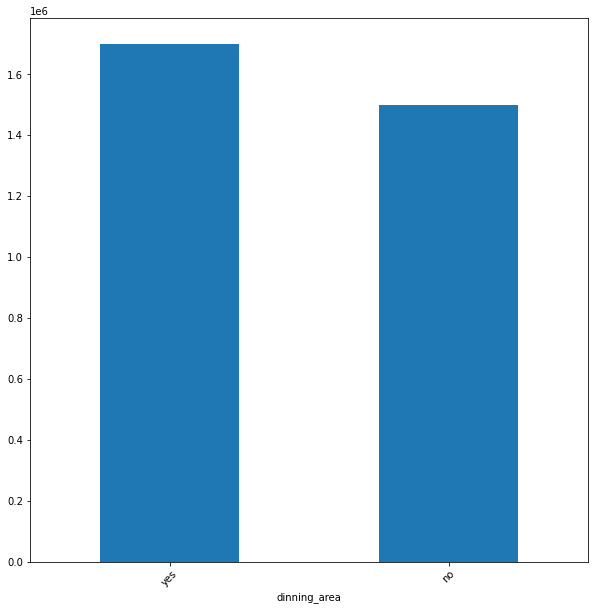

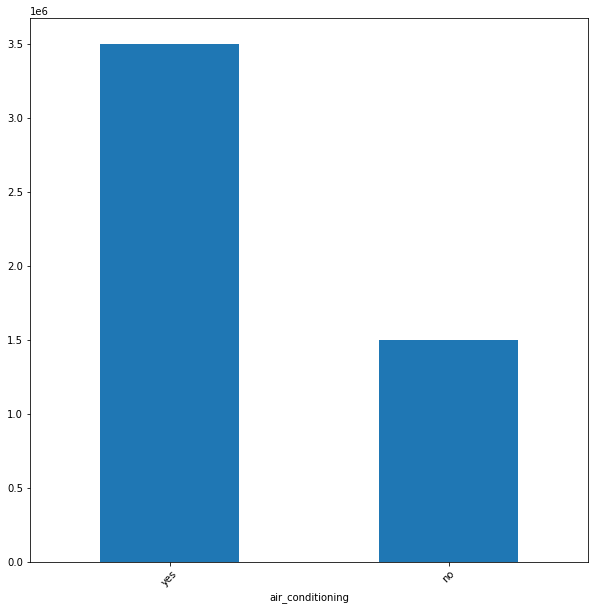

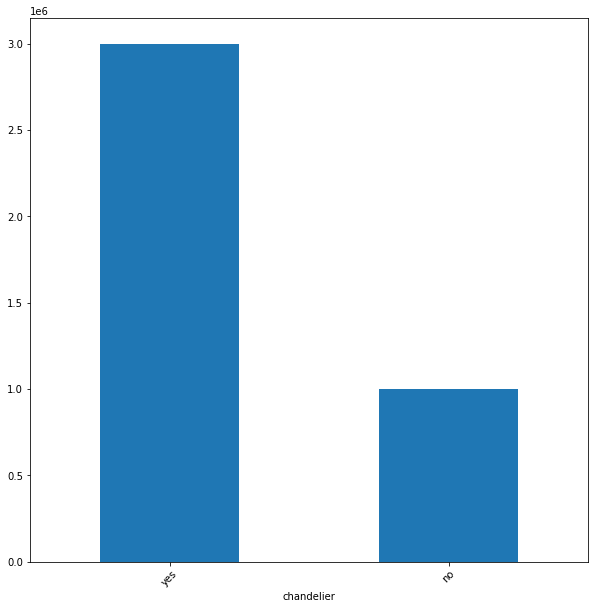

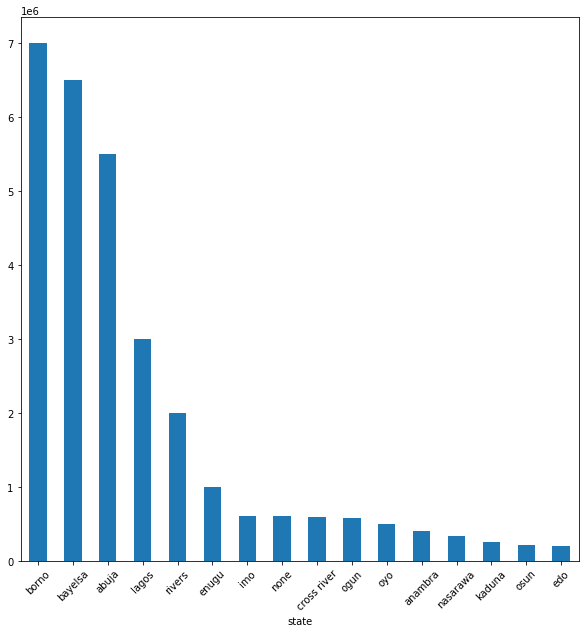

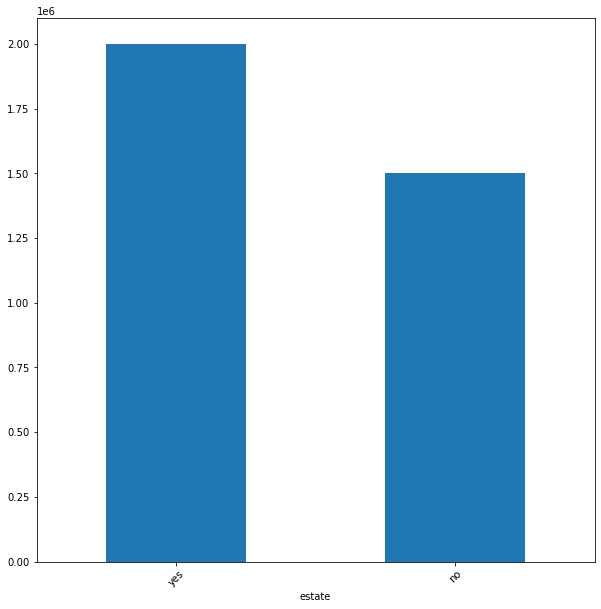

In [5]:
## checking the average price of each unique value in each column
for column in cat:
    plt.figure(figsize = (10,10))
    if column in ['location','estate name','facilities']:
        pass
    else:
        data.groupby(column)['price'].median().sort_values(ascending = False).plot(kind = 'bar')
        plt.xticks(rotation = 45)
        plt.show()

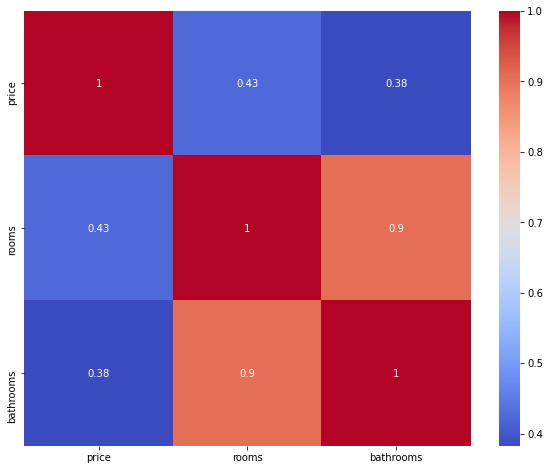

In [6]:
## moving unto the numerical value
## we just have one continous column (price) and two discrete columns(rooms, bathrooms)
## firt we use a heatmap to check its correlation 

corr = data[num].corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.show()

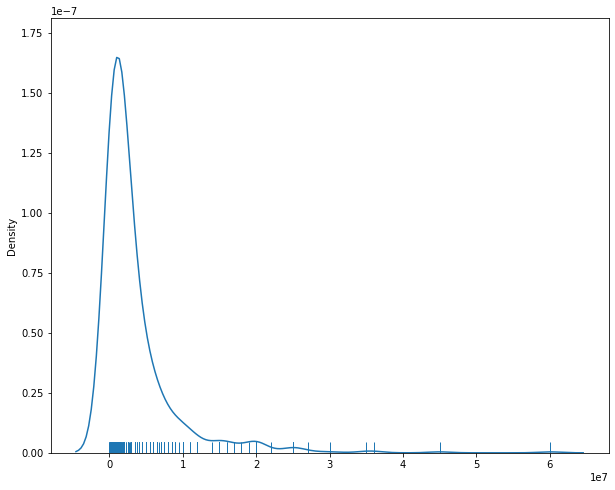

In [7]:
## plot a displot to check it distribution or level of skewness

plt.figure(figsize = (10,8))
sns.distplot(x = data.price.values, rug = True, hist = False)
plt.show()

In [8]:
'''
some engineering work needs to be done on some columns:
log transform PRICE column to reduce skewness
bin the ROOMS and BATHROOMS column
convert all categorical values to numerical values
drop the remaning irrelavant columns still present in our data
'''

'\nsome engineering work needs to be done on some columns:\nlog transform PRICE column to reduce skewness\nbin the ROOMS and BATHROOMS column\nconvert all categorical values to numerical values\ndrop the remaning irrelavant columns still present in our data\n'

In [9]:
num

['price', 'rooms', 'bathrooms']

In [10]:
data.loc[data.location.str.contains('imo')]

,price,location,house_type,rooms,bathrooms,rent_duration,estate name,condition,furnishing,facilities,area,dishwasher,prepaid_meter,dinning_area,air_conditioning,chandelier,state,estate
97,600000,"imo, owerri",Block of Flats,2,3,per annum,jeuidco homes,Newly Built,Unfurnished,"24 hours electricity,hot water,balcony,pre pai...",urban,no,yes,yes,no,yes,imo,no
193,600000,"imo, owerri",Apartment,3,4,per quarter,unknown,Newly Built,Semi-Furnished,"tiled floor,pop ceiling,dining area,wardrobe,k...",urban,no,yes,yes,no,no,imo,no
212,700000,"imo, owerri",Apartment,3,3,per annum,unknown,Fairly Used,Semi-Furnished,"apartment,balcony,tiled floor,pop ceiling,dini...",urban,no,yes,yes,no,no,imo,no
220,700000,"imo, owerri",Apartment,3,4,per annum,unknown,Fairly Used,Furnished,"dining area,pre paid meter,tiled floor,kitchen...",urban,no,yes,yes,no,no,imo,no
272,600000,"imo, owerri",Block of Flats,3,4,per annum,jeuidco homes,Newly Built,Furnished,"dining area,pre paid meter,24 hours electricit...",urban,no,yes,yes,no,yes,imo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2000000,"imo, owerri",Duplex,5,5,per annum,unknown,Newly Built,Furnished,none,urban,no,no,no,no,no,imo,no
662,1500000,"imo, owerri",Duplex,5,5,per annum,unknown,Newly Built,Furnished,none,urban,no,no,no,no,no,imo,no
663,1500000,"imo, owerri",Duplex,5,5,per annum,unknown,Fairly Used,Semi-Furnished,none,urban,no,no,no,no,no,imo,no
664,1500000,"imo, owerri",Duplex,5,5,per annum,unknown,Fairly Used,Furnished,none,urban,no,no,no,no,no,imo,no
